# "Importing" the packages we may need

In [1]:
using Dates
using BenchmarkTools
using Statistics
using HTTP
using CSV, CSVFiles
using JuliaDB
using DataValues
using Plots
using Query

## Setup GR backend for `Plots.jl`

In [2]:
gr()

Plots.GRBackend()

## Constants

In [3]:
BASE_URL = "https://www.ncei.noaa.gov/access/services/data/v1"

"https://www.ncei.noaa.gov/access/services/data/v1"

Note string formatting:

In [4]:
STATIONS = ("ISE00105694",)
STATIONS_QUERY = "stations=$( join(STATIONS, ",") )"

DATA_TYPES = ("TAVG", "TMAX", "TMIN", "PRCP")
DATA_TYPES_QUERY = "dataTypes=$( join(DATA_TYPES, ",") )"

START, END = "2002-01-01", "2019-11-15"

BASE_PARAMS = ("units=metric",
               "dataset=daily-summaries",
               "startDate=$START",
               "endDate=$END",               
               STATIONS_QUERY,
               DATA_TYPES_QUERY)

("units=metric", "dataset=daily-summaries", "startDate=2002-01-01", "endDate=2019-11-15", "stations=ISE00105694", "dataTypes=TAVG,TMAX,TMIN,PRCP")

Note `join` function:

In [5]:
QUERY_STRING = join(BASE_PARAMS, "&")
REQUEST_STRING = join((BASE_URL, QUERY_STRING), "?");

In [6]:
REQUEST_STRING

"https://www.ncei.noaa.gov/access/services/data/v1?units=metric&dataset=daily-summaries&startDate=2002-01-01&endDate=2019-11-15&stations=ISE00105694&dataTypes=TAVG,TMAX,TMIN,PRCP"

Note `@assert` macro:

In [7]:
r = HTTP.request("GET", REQUEST_STRING)
@assert r.status == 200

Is reading CSV fast enough?

In [8]:
@btime CSV.read(IOBuffer(r.body))

  3.144 ms (220 allocations: 17.11 KiB)


6510×6 DataFrames.DataFrame
│ Row  │ STATION     │ DATE       │ PRCP     │ TAVG     │ TMAX     │ TMIN     │
│      │ String      │ Date       │ Float64⍰ │ Float64⍰ │ Float64⍰ │ Float64⍰ │
├──────┼─────────────┼────────────┼──────────┼──────────┼──────────┼──────────┤
│ 1    │ ISE00105694 │ 2002-01-01 │ 18.0     │ missing  │ 19.5     │ 6.2      │
│ 2    │ ISE00105694 │ 2002-01-02 │ 0.0      │ missing  │ 18.7     │ 7.1      │
│ 3    │ ISE00105694 │ 2002-01-03 │ 0.0      │ missing  │ 15.6     │ 11.6     │
│ 4    │ ISE00105694 │ 2002-01-04 │ 0.0      │ missing  │ 16.7     │ 5.8      │
│ 5    │ ISE00105694 │ 2002-01-05 │ 29.1     │ missing  │ 16.4     │ 5.4      │
│ 6    │ ISE00105694 │ 2002-01-06 │ 71.1     │ missing  │ 12.6     │ 7.7      │
│ 7    │ ISE00105694 │ 2002-01-07 │ 21.9     │ missing  │ 10.3     │ 4.0      │
│ 8    │ ISE00105694 │ 2002-01-08 │ 36.8     │ missing  │ 14.5     │ 7.0      │
│ 9    │ ISE00105694 │ 2002-01-09 │ 0.0      │ missing  │ 11.8     │ 7.2      │
│ 10   │ ISE00105694 │ 2002-01-10 │ 4.8      │ missing  │ 11.4     │ 6.2      │
⋮
│ 6500 │ ISE00105694 │ 2019-11-01 │ 0.0      │ 20.9     │ 25.8     │ 15.8     │
│ 6501 │ ISE00105694 │ 2019-11-02 │ 0.0      │ 20.7     │ 26.3     │ 15.5     │
│ 6502 │ ISE00105694 │ 2019-11-03 │ 0.0      │ 21.1     │ 27.6     │ 15.0     │
│ 6503 │ ISE00105694 │ 2019-11-04 │ 0.0      │ 20.7     │ 28.7     │ 13.9     │
│ 6504 │ ISE00105694 │ 2019-11-05 │ 0.0      │ 22.6     │ 30.1     │ 13.2     │
│ 6505 │ ISE00105694 │ 2019-11-06 │ 0.0      │ 22.7     │ 28.9     │ 15.8     │
│ 6506 │ ISE00105694 │ 2019-11-07 │ 0.0      │ 22.3     │ missing  │ 16.3     │
│ 6507 │ ISE00105694 │ 2019-11-08 │ 0.0      │ 21.6     │ 29.4     │ 14.1     │
│ 6508 │ ISE00105694 │ 2019-11-09 │ 0.0      │ 21.6     │ 28.2     │ 14.5     │
│ 6509 │ ISE00105694 │ 2019-11-10 │ 0.0      │ 21.6     │ 31.0     │ 15.0     │
│ 6510 │ ISE00105694 │ 2019-11-11 │ 0.0      │ 24.6     │ 32.3     │ 15.7     │

In [9]:
typeof(ans)

DataFrames.DataFrame

Creating a dataframe from JuliaDB:

In [10]:
data, cols = csvread(IOBuffer(r.body))
jdf = table(data..., names = [Symbol(cl) for cl in cols]);

In [11]:
jdf

Table with 6510 rows, 6 columns:
STATION        DATE        PRCP  TAVG     TMAX     TMIN
───────────────────────────────────────────────────────
"ISE00105694"  2002-01-01  18.0  missing  19.5     6.2
"ISE00105694"  2002-01-02  0.0   missing  18.7     7.1
"ISE00105694"  2002-01-03  0.0   missing  15.6     11.6
"ISE00105694"  2002-01-04  0.0   missing  16.7     5.8
"ISE00105694"  2002-01-05  29.1  missing  16.4     5.4
"ISE00105694"  2002-01-06  71.1  missing  12.6     7.7
"ISE00105694"  2002-01-07  21.9  missing  10.3     4.0
"ISE00105694"  2002-01-08  36.8  missing  14.5     7.0
"ISE00105694"  2002-01-09  0.0   missing  11.8     7.2
"ISE00105694"  2002-01-10  4.8   missing  11.4     6.2
"ISE00105694"  2002-01-11  1.0   missing  12.3     3.0
"ISE00105694"  2002-01-12  0.0   missing  13.7     6.6
⋮
"ISE00105694"  2019-11-01  0.0   20.9     25.8     15.8
"ISE00105694"  2019-11-02  0.0   20.7     26.3     15.5
"ISE00105694"  2019-11-03  0.0   21.1     27.6     15.0
"ISE00105694"  2019-11-0

In [12]:
@btime csvread(IOBuffer(r.body))

  9.132 ms (130930 allocations: 4.87 MiB)


((["ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694"  …  "ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694", "ISE00105694"], Date[2002-01-01, 2002-01-02, 2002-01-03, 2002-01-04, 2002-01-05, 2002-01-06, 2002-01-07, 2002-01-08, 2002-01-09, 2002-01-10  …  2019-11-02, 2019-11-03, 2019-11-04, 2019-11-05, 2019-11-06, 2019-11-07, 2019-11-08, 2019-11-09, 2019-11-10, 2019-11-11], Union{Missing, Float64}[18.0, 0.0, 0.0, 0.0, 29.1, 71.1, 21.9, 36.8, 0.0, 4.8  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Any[missing, missing, missing, missing, missing, missing, missing, missing, missing, missing  …  20.7, 21.1, 20.7, 22.6, 22.7, 22.3, 21.6, 21.6, 21.6, 24.6], Union{Missing, Float64}[19.5, 18.7, 15.6, 16.7, 16.4, 12.6, 10.3, 14.5, 11.8, 11.4  …  26.3, 27.6, 28.7, 30.1, 28.9, missing, 29.4, 28.2, 31.0, 32.3], Un

In [13]:
@btime table(data..., names = [Symbol(cl) for cl in cols]);

  289.678 μs (6624 allocations: 734.72 KiB)


In [14]:
jdf[5]

NamedTuple{(:STATION, :DATE, :PRCP, :TAVG, :TMAX, :TMIN),Tuple{String,Date,Union{Missing, Float64},Any,Union{Missing, Float64},Union{Missing, Float64}}}(("ISE00105694", 2002-01-05, 29.1, missing, 16.4, 5.4))

Few things to note:

- `Union{Missing, Float64}` type for columns,
- dates are handled automatically.

In [15]:
jdf[1:2:5]

Table with 3 rows, 6 columns:
STATION        DATE        PRCP  TAVG     TMAX  TMIN
────────────────────────────────────────────────────
"ISE00105694"  2002-01-01  18.0  missing  19.5  6.2
"ISE00105694"  2002-01-03  0.0   missing  15.6  11.6
"ISE00105694"  2002-01-05  29.1  missing  16.4  5.4

In [16]:
jdf[[1, 3, 5]]

Table with 3 rows, 6 columns:
STATION        DATE        PRCP  TAVG     TMAX  TMIN
────────────────────────────────────────────────────
"ISE00105694"  2002-01-01  18.0  missing  19.5  6.2
"ISE00105694"  2002-01-03  0.0   missing  15.6  11.6
"ISE00105694"  2002-01-05  29.1  missing  16.4  5.4

In [17]:
select(jdf, (:TAVG, :PRCP))

Table with 6510 rows, 2 columns:
TAVG     PRCP
─────────────
missing  18.0
missing  0.0
missing  0.0
missing  0.0
missing  29.1
missing  71.1
missing  21.9
missing  36.8
missing  0.0
missing  4.8
missing  1.0
missing  0.0
⋮
20.9     0.0
20.7     0.0
21.1     0.0
20.7     0.0
22.6     0.0
22.7     0.0
22.3     0.0
21.6     0.0
21.6     0.0
21.6     0.0
24.6     0.0

In [18]:
jdf = select(jdf, colnames(jdf)[2:end])

Table with 6510 rows, 5 columns:
DATE        PRCP  TAVG     TMAX     TMIN
────────────────────────────────────────
2002-01-01  18.0  missing  19.5     6.2
2002-01-02  0.0   missing  18.7     7.1
2002-01-03  0.0   missing  15.6     11.6
2002-01-04  0.0   missing  16.7     5.8
2002-01-05  29.1  missing  16.4     5.4
2002-01-06  71.1  missing  12.6     7.7
2002-01-07  21.9  missing  10.3     4.0
2002-01-08  36.8  missing  14.5     7.0
2002-01-09  0.0   missing  11.8     7.2
2002-01-10  4.8   missing  11.4     6.2
2002-01-11  1.0   missing  12.3     3.0
2002-01-12  0.0   missing  13.7     6.6
⋮
2019-11-01  0.0   20.9     25.8     15.8
2019-11-02  0.0   20.7     26.3     15.5
2019-11-03  0.0   21.1     27.6     15.0
2019-11-04  0.0   20.7     28.7     13.9
2019-11-05  0.0   22.6     30.1     13.2
2019-11-06  0.0   22.7     28.9     15.8
2019-11-07  0.0   22.3     missing  16.3
2019-11-08  0.0   21.6     29.4     14.1
2019-11-09  0.0   21.6     28.2     14.5
2019-11-10  0.0   21.6     31.0  

In [20]:
filter(x -> !ismissing(x.PRCP) && (x.PRCP ≠ 0) , jdf)

Table with 862 rows, 5 columns:
DATE        PRCP  TAVG     TMAX  TMIN
─────────────────────────────────────
2002-01-01  18.0  missing  19.5  6.2
2002-01-05  29.1  missing  16.4  5.4
2002-01-06  71.1  missing  12.6  7.7
2002-01-07  21.9  missing  10.3  4.0
2002-01-08  36.8  missing  14.5  7.0
2002-01-10  4.8   missing  11.4  6.2
2002-01-11  1.0   missing  12.3  3.0
2002-01-19  15.4  missing  17.6  3.8
2002-01-20  7.3   missing  17.4  6.0
2002-01-21  5.0   missing  17.0  9.1
2002-01-26  7.6   missing  21.2  3.2
2002-01-27  3.5   missing  21.7  7.3
⋮
2018-02-26  1.0   17.0     22.7  13.7
2018-02-27  9.7   16.2     20.2  13.0
2018-03-28  4.1   25.1     32.0  16.4
2018-03-30  1.5   17.3     20.7  14.4
2018-04-10  3.8   16.7     20.2  13.3
2018-04-11  8.4   17.8     22.5  13.9
2018-04-26  16.5  18.5     23.5  14.8
2018-04-27  1.0   19.5     25.0  13.6
2018-05-13  3.3   21.7     25.5  18.7
2018-06-13  9.4   25.7     29.9  21.4
2018-12-06  0.5   14.3     17.4  12.8

In [21]:
map(x -> (DELTA = x.TMAX - x.TMIN,), jdf)

Table with 6510 rows, 1 columns:
DELTA
───────
13.3
11.6
4.0
10.9
11.0
4.9
6.3
7.5
4.6
5.2
9.3
7.1
⋮
10.0
10.8
12.6
14.8
16.9
13.1
missing
15.3
13.7
16.0
16.6

In [22]:
function sx(tbl::IndexedTable, cols::AbstractArray{Symbol, 1})
    select(tbl, Tuple(cols))
end

function sx(tbl::IndexedTable, cols::AbstractArray{<:AbstractString, 1})
    actual_cols = colnames(tbl)
    sx(tbl, [Symbol(col) for col in cols if Symbol(col) in actual_cols])
end

sx (generic function with 2 methods)

In [566]:
sx(jdf, [:TAVG])

Table with 6510 rows, 1 columns:
TAVG
───────
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
⋮
20.9
20.7
21.1
20.7
22.6
22.7
22.3
21.6
21.6
21.6
24.6

In [23]:
Array{String, 1} <: AbstractArray{AbstractString, 1}

false

In [24]:
sx(jdf, ["TAVG"])

Table with 6510 rows, 1 columns:
TAVG
───────
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
⋮
20.9
20.7
21.1
20.7
22.6
22.7
22.3
21.6
21.6
21.6
24.6

In [25]:
@which sx(jdf, ["TAVG"])

sx(tbl::IndexedTable, cols::AbstractArray{#s35,1} where #s35<:AbstractString) in Main at In[22]:6

In [26]:
methods(getindex)

# 480 methods for generic function "getindex":
[1] getindex(v::Core.SimpleVector, i::Int64) in Base at essentials.jl:585
[2] getindex(v::Core.SimpleVector, I::AbstractArray) in Base at essentials.jl:621
[3] getindex(s::String, r::UnitRange{Int64}) in Base at strings/string.jl:242
[4] getindex(s::String, i::Int64) in Base at strings/string.jl:207
[5] getindex(s::String, r::UnitRange{#s75} where #s75<:Integer) in Base at strings/string.jl:239
[6] getindex(m::RegexMatch, name::Symbol) in Base at regex.jl:159
[7] getindex(m::RegexMatch, idx::Integer) in Base at regex.jl:157
[8] getindex(m::RegexMatch, name::AbstractString) in Base at regex.jl:163
[9] getindex(r::Core.Compiler.StmtRange, ind::Integer) in Base.IRShow at show.jl:1584
[10] getindex(::Base.EnvDict, k::AbstractString) in Base at env.jl:79
[11] getindex(x::Base.Threads.Atomic{Int8}) in Base.Threads at atomics.jl:347
[12] getindex(x::Base.Threads.Atomic{Int16}) in Base.Threads at atomics.jl:347
[13] getindex(x::Base.Threads.Atomic{Int32}) in Base.Threads at atomics.jl:347
[14] getindex(x::Base.Threads.Atomic{Int64}) in Base.Threads at atomics.jl:347
[15] getindex(x::Base.Threads.Atomic{Int128}) in Base.Threads at atomics.jl:347
[16] getindex(x::Base.Threads.Atomic{UInt8}) in Base.Threads at atomics.jl:347
[17] getindex(x::Base.Threads.Atomic{UInt16}) in Base.Threads at atomics.jl:347
[18] getindex(x::Base.Threads.Atomic{UInt32}) in Base.Threads at atomics.jl:347
[19] getindex(x::Base.Threads.Atomic{UInt64}) in Base.Threads at atomics.jl:347
[20] getindex(x::Base.Threads.Atomic{UInt128}) in Base.Threads at atomics.jl:347
[21] getindex(x::Base.Threads.Atomic{Float16}) in Base.Threads at atomics.jl:347
[22] getindex(x::Base.Threads.Atomic{Float32}) in Base.Threads at atomics.jl:347
[23] getindex(x::Base.Threads.Atomic{Float64}) in Base.Threads at atomics.jl:347
[24] getindex(x::Base.Threads.Atomic{Bool}) in Base.Threads at atomics.jl:347
[25] getindex(::Base.TTY, key::Symbol) in Base at stream.jl:503
[26] getindex(cmd::Cmd, i) in Base at process.jl:967
[27] getindex(buffer::Base64.Buffer, i::Integer) in Base64 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Base64/src/buffer.jl:16
[28] getindex(md::Markdown.MD, args...) in Markdown at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Markdown/src/parse/parse.jl:24
[29] getindex(cache::LibGit2.CachedCredentials, cred_id) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/types.jl:1275
[30] getindex(idx::LibGit2.GitIndex, i::Integer) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/index.jl:180
[31] getindex(diff::LibGit2.GitDiff, i::Integer) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/diff.jl:121
[32] getindex(rb::LibGit2.GitRebase, i::Integer) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/rebase.jl:35
[33] getindex(blame::LibGit2.GitBlame, i::Integer) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/blame.jl:34
[34] getindex(status::LibGit2.GitStatus, i::Integer) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/status.jl:28
[35] getindex(tree::LibGit2.GitTree, i::Integer) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/tree.jl:102
[36] getindex(tree::LibGit2.GitTree, target::AbstractString) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/tree.jl:164
[37] getindex(r::Distributed.Future) in Distributed at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Distributed/src/remotecall.jl:622
[38] getindex(r::Distributed.Future, args...) in Distributed at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Distributed/src/remotecall.jl:624
[39] getindex(t::REPL.Terminals.TT

In [553]:
import Base.getindex

function getindex(tbl::IndexedTable, col::Symbol)
    select(tbl, col)
end

function getindex(tbl::IndexedTable, col::AbstractString)
    getindex(tbl, Symbol(col))
end

function getindex(tbl::IndexedTable, cols::AbstractArray{Symbol, 1})
    select(tbl, Tuple(cols))
end

function getindex(tbl::IndexedTable,
                  cols::AbstractArray{<:AbstractString, 1})
    actual_cols = colnames(tbl)
    select(tbl, Tuple((Symbol(col) for col in cols if Symbol(col) in actual_cols)...))
end

getindex (generic function with 484 methods)

In [28]:
subtypes(AbstractString)

10-element Array{Any,1}:
 CSV.PointerString                  
 CategoricalArrays.CategoricalString
 PooledString                       
 String                             
 SubString                          
 SubstitutionString                 
 Test.GenericString                 
 TextParse.VectorBackedUTF8String   
 WeakRefStrings.EscapedString       
 WeakRefStrings.WeakRefString       

In [29]:
methods(getindex)

# 484 methods for generic function "getindex":
[1] getindex(v::Core.SimpleVector, i::Int64) in Base at essentials.jl:585
[2] getindex(v::Core.SimpleVector, I::AbstractArray) in Base at essentials.jl:621
[3] getindex(s::String, r::UnitRange{Int64}) in Base at strings/string.jl:242
[4] getindex(s::String, i::Int64) in Base at strings/string.jl:207
[5] getindex(s::String, r::UnitRange{#s75} where #s75<:Integer) in Base at strings/string.jl:239
[6] getindex(m::RegexMatch, name::Symbol) in Base at regex.jl:159
[7] getindex(m::RegexMatch, idx::Integer) in Base at regex.jl:157
[8] getindex(m::RegexMatch, name::AbstractString) in Base at regex.jl:163
[9] getindex(r::Core.Compiler.StmtRange, ind::Integer) in Base.IRShow at show.jl:1584
[10] getindex(::Base.EnvDict, k::AbstractString) in Base at env.jl:79
[11] getindex(x::Base.Threads.Atomic{Int8}) in Base.Threads at atomics.jl:347
[12] getindex(x::Base.Threads.Atomic{Int16}) in Base.Threads at atomics.jl:347
[13] getindex(x::Base.Threads.Atomic{Int32}) in Base.Threads at atomics.jl:347
[14] getindex(x::Base.Threads.Atomic{Int64}) in Base.Threads at atomics.jl:347
[15] getindex(x::Base.Threads.Atomic{Int128}) in Base.Threads at atomics.jl:347
[16] getindex(x::Base.Threads.Atomic{UInt8}) in Base.Threads at atomics.jl:347
[17] getindex(x::Base.Threads.Atomic{UInt16}) in Base.Threads at atomics.jl:347
[18] getindex(x::Base.Threads.Atomic{UInt32}) in Base.Threads at atomics.jl:347
[19] getindex(x::Base.Threads.Atomic{UInt64}) in Base.Threads at atomics.jl:347
[20] getindex(x::Base.Threads.Atomic{UInt128}) in Base.Threads at atomics.jl:347
[21] getindex(x::Base.Threads.Atomic{Float16}) in Base.Threads at atomics.jl:347
[22] getindex(x::Base.Threads.Atomic{Float32}) in Base.Threads at atomics.jl:347
[23] getindex(x::Base.Threads.Atomic{Float64}) in Base.Threads at atomics.jl:347
[24] getindex(x::Base.Threads.Atomic{Bool}) in Base.Threads at atomics.jl:347
[25] getindex(::Base.TTY, key::Symbol) in Base at stream.jl:503
[26] getindex(cmd::Cmd, i) in Base at process.jl:967
[27] getindex(buffer::Base64.Buffer, i::Integer) in Base64 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Base64/src/buffer.jl:16
[28] getindex(md::Markdown.MD, args...) in Markdown at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Markdown/src/parse/parse.jl:24
[29] getindex(cache::LibGit2.CachedCredentials, cred_id) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/types.jl:1275
[30] getindex(idx::LibGit2.GitIndex, i::Integer) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/index.jl:180
[31] getindex(diff::LibGit2.GitDiff, i::Integer) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/diff.jl:121
[32] getindex(rb::LibGit2.GitRebase, i::Integer) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/rebase.jl:35
[33] getindex(blame::LibGit2.GitBlame, i::Integer) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/blame.jl:34
[34] getindex(status::LibGit2.GitStatus, i::Integer) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/status.jl:28
[35] getindex(tree::LibGit2.GitTree, i::Integer) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/tree.jl:102
[36] getindex(tree::LibGit2.GitTree, target::AbstractString) in LibGit2 at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/LibGit2/src/tree.jl:164
[37] getindex(r::Distributed.Future) in Distributed at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Distributed/src/remotecall.jl:622
[38] getindex(r::Distributed.Future, args...) in Distributed at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.2/Distributed/src/remotecall.jl:624
[39] getindex(t::REPL.Terminals.TT

In [554]:
jdf[:TMIN]

6510-element Array{Union{Missing, Float64},1}:
  6.2
  7.1
 11.6
  5.8
  5.4
  7.7
  4.0
  7.0
  7.2
  6.2
  3.0
  6.6
  8.4
  ⋮  
 15.2
 15.8
 15.5
 15.0
 13.9
 13.2
 15.8
 16.3
 14.1
 14.5
 15.0
 15.7

In [555]:
jdf[[:TMIN]]

Table with 6510 rows, 1 columns:
TMIN
────
6.2
7.1
11.6
5.8
5.4
7.7
4.0
7.0
7.2
6.2
3.0
6.6
⋮
15.8
15.5
15.0
13.9
13.2
15.8
16.3
14.1
14.5
15.0
15.7

In [32]:
jdf["TMIN"]

6510-element Array{Union{Missing, Float64},1}:
  6.2
  7.1
 11.6
  5.8
  5.4
  7.7
  4.0
  7.0
  7.2
  6.2
  3.0
  6.6
  8.4
  ⋮  
 15.2
 15.8
 15.5
 15.0
 13.9
 13.2
 15.8
 16.3
 14.1
 14.5
 15.0
 15.7

In [33]:
jdf[["TMIN"]]

Table with 6510 rows, 1 columns:
TMIN
────
6.2
7.1
11.6
5.8
5.4
7.7
4.0
7.0
7.2
6.2
3.0
6.6
⋮
15.8
15.5
15.0
13.9
13.2
15.8
16.3
14.1
14.5
15.0
15.7

In [34]:
jdf["TMED"]

ErrorException: type NamedTuple has no field TMED

In [35]:
jdf[["TAVG", "TMED"]]

Table with 6510 rows, 1 columns:
TAVG
───────
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
missing
⋮
20.9
20.7
21.1
20.7
22.6
22.7
22.3
21.6
21.6
21.6
24.6

In [136]:
jdf === transform(jdf, :DELTA => map(x -> x.TMAX - x.TMIN, jdf))

false

Do we need datetime accessor attributes?

In [36]:
@btime Dates.month.(select(jdf, :DATE))

  120.639 μs (4 allocations: 50.98 KiB)


6510-element Array{Int64,1}:
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  ⋮
 10
 11
 11
 11
 11
 11
 11
 11
 11
 11
 11
 11

Head and tail:

In [37]:
jdf[1:10]

Table with 10 rows, 5 columns:
DATE        PRCP  TAVG     TMAX  TMIN
─────────────────────────────────────
2002-01-01  18.0  missing  19.5  6.2
2002-01-02  0.0   missing  18.7  7.1
2002-01-03  0.0   missing  15.6  11.6
2002-01-04  0.0   missing  16.7  5.8
2002-01-05  29.1  missing  16.4  5.4
2002-01-06  71.1  missing  12.6  7.7
2002-01-07  21.9  missing  10.3  4.0
2002-01-08  36.8  missing  14.5  7.0
2002-01-09  0.0   missing  11.8  7.2
2002-01-10  4.8   missing  11.4  6.2

In [38]:
jdf[end-10:end]

Table with 11 rows, 5 columns:
DATE        PRCP  TAVG  TMAX     TMIN
─────────────────────────────────────
2019-11-01  0.0   20.9  25.8     15.8
2019-11-02  0.0   20.7  26.3     15.5
2019-11-03  0.0   21.1  27.6     15.0
2019-11-04  0.0   20.7  28.7     13.9
2019-11-05  0.0   22.6  30.1     13.2
2019-11-06  0.0   22.7  28.9     15.8
2019-11-07  0.0   22.3  missing  16.3
2019-11-08  0.0   21.6  29.4     14.1
2019-11-09  0.0   21.6  28.2     14.5
2019-11-10  0.0   21.6  31.0     15.0
2019-11-11  0.0   24.6  32.3     15.7

# Basic plotting

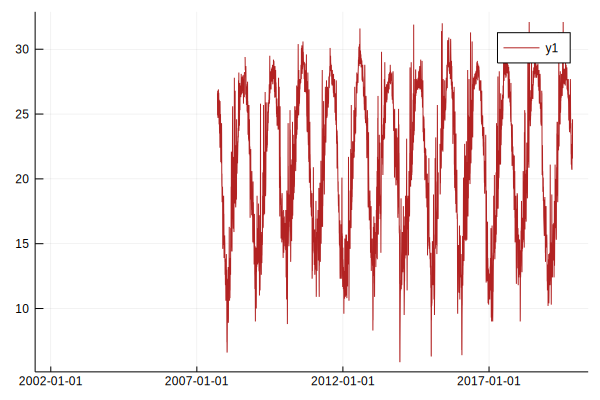

In [39]:
# Naive plot

plot(jdf[:DATE], jdf[:TAVG], linecolor=:firebrick)

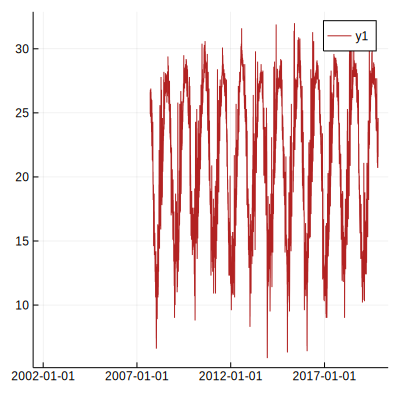

In [234]:
# Change size

plot(jdf[:DATE], jdf[:TAVG], linecolor=:firebrick, size=(400,400))

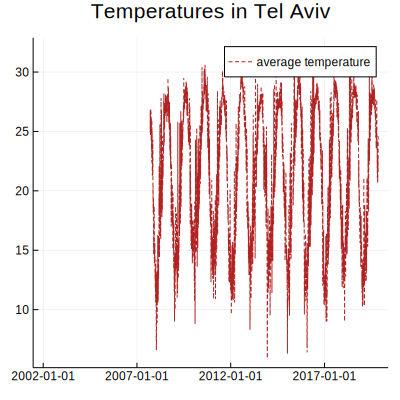

In [41]:
# Make it nicer

plot(jdf[:DATE], jdf[:TAVG],
     linecolor=:firebrick, size=(400,400), linestyle=:dash,
     label="average temperature",
     title="Temperatures in Tel Aviv")

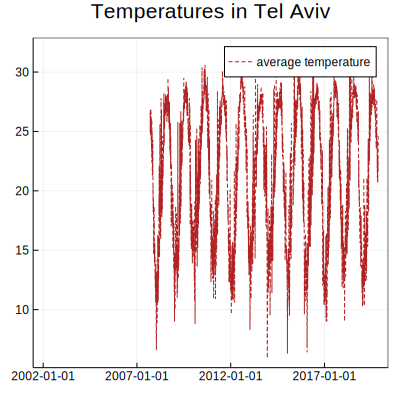

In [42]:
plot(jdf[:DATE], jdf[:TAVG],
     linecolor=:firebrick, size=(400,400), linestyle=:dash,
     label="average temperature",
     title="Temperatures in Tel Aviv",
     framestyle=:box)

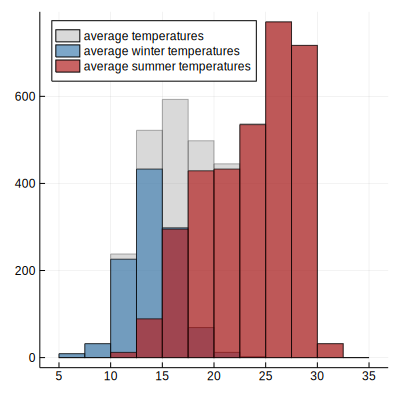

In [43]:
histogram(jdf[:TAVG], alpha=0.3, label="average temperatures",
          bins=5:2.5:35, color=:gray)

histogram!(filter(x -> Dates.month(x.DATE) in (12, 1, 2), jdf)[:TAVG],
    size=(400,400), label="average winter temperatures",
    bins=5:2.5:35, alpha=0.7,
    color=:steelblue)

histogram!(filter(x -> ~(Dates.month(x.DATE) in (12, 1, 2)), jdf)[:TAVG],
    size=(400,400), label="average summer temperatures",
    bins=5:2.5:35, alpha=0.7,
    color=:firebrick,
    legend=:topleft)

# Intermezzo: indexing dataframes with dates

## DateTime slices

In [44]:
d1 = DateTime(2012, 1, 1, 12, 0, 1)
d2 = Date(2013, 1, 1)

2013-01-01

In [45]:
typeof(d1)

DateTime

In [46]:
d1:Day(1):d2

MethodError: MethodError: no method matching (::Colon)(::DateTime, ::Day, ::Date)
Closest candidates are:
  Colon(::T, ::Any, !Matched::T) where T at range.jl:40
  Colon(!Matched::T<:Real, ::Any, !Matched::T<:Real) where T<:Real at range.jl:41
  Colon(!Matched::A<:Real, ::Any, !Matched::C<:Real) where {A<:Real, C<:Real} at range.jl:10
  ...

In [479]:
using Base: Colon

struct DateTimeRange
    start_t::TimeType
    end_t::TimeType
end

struct DateTimeRollerN
    df::IndexedTable
    col::Symbol
    dates::Array{TimeType, 1}
    idx::Array{}
end

function (::Colon)(s::TimeType, f::TimeType)
    DateTimeRange(s, f)
end

function rolling(df::IndexedTable, col::Union{AbstractString, Symbol}, periods::Integer, freq::Period=Minute(1))
    dates::Array{Date, 1} = df[col]
    idx = Array{Int64, 2}(undef, length(df), 2)

    idx[1, :] .= [1, 1]

    for (ri, dt) in enumerate(dates[2:end])
        mask = (dates[idx[ri, 1]:ri+1] .≥ dt - freq * (periods - 1)) .& (dates[idx[ri, 1]:ri+1] .≤ dt)
        idx[ri+1, 1] = findfirst(mask) + idx[ri, 1] - 1
        idx[ri+1, 2] = findlast(mask) + idx[ri, 1] - 1
    end
    DateTimeRollerN(jdf, Symbol(col), dates, idx)
end

rolling (generic function with 2 methods)

In [480]:
@code_warntype rolling(jdf, :DATE, 10, Day(1))

Variables
  #self#::Core.Compiler.Const(rolling, false)
  df::IndexedTable{StructArrays.StructArray{NamedTuple{(:DATE, :PRCP, :TAVG, :TMAX, :TMIN),Tuple{Date,Union{Missing, Float64},Union{Missing, Float64},Union{Missing, Float64},Union{Missing, Float64}}},1,NamedTuple{(:DATE, :PRCP, :TAVG, :TMAX, :TMIN),Tuple{Array{Date,1},Array{Union{Missing, Float64},1},Array{Union{Missing, Float64},1},Array{Union{Missing, Float64},1},Array{Union{Missing, Float64},1}}},Int64}}
  col::Symbol
  periods::Int64
  freq::Day
  dates::Array{Date,1}
  idx::Array{Int64,2}
  @_8::Union{Nothing, Tuple{Tuple{Int64,Date},Tuple{Int64,Int64}}}
  ri::Int64
  dt::Date
  @_11::Int64
  mask::BitArray{1}

Body::DateTimeRollerN
1 ─ %1  = Base.getindex(df, col)::Union{Array{Date,1}, Array{Union{Missing, Float64},1}}
│   %2  = Core.apply_type(Main.Array, Main.Date, 1)::Core.Compiler.Const(Array{Date,1}, false)
│   %3  = Base.convert(%2, %1)::Array{Date,1}
│         (dates = Core.typeassert(%3, %2))
│   %5  = Core.apply_typ

In [476]:
@btime roller = rolling(jdf, :DATE, 10, Day(1))

DateTimeRollerN(Table with 6510 rows, 5 columns:
DATE        PRCP  TAVG     TMAX     TMIN
────────────────────────────────────────
2002-01-01  18.0  missing  19.5     6.2
2002-01-02  0.0   missing  18.7     7.1
2002-01-03  0.0   missing  15.6     11.6
2002-01-04  0.0   missing  16.7     5.8
2002-01-05  29.1  missing  16.4     5.4
2002-01-06  71.1  missing  12.6     7.7
2002-01-07  21.9  missing  10.3     4.0
2002-01-08  36.8  missing  14.5     7.0
2002-01-09  0.0   missing  11.8     7.2
2002-01-10  4.8   missing  11.4     6.2
2002-01-11  1.0   missing  12.3     3.0
2002-01-12  0.0   missing  13.7     6.6
⋮
2019-11-01  0.0   20.9     25.8     15.8
2019-11-02  0.0   20.7     26.3     15.5
2019-11-03  0.0   21.1     27.6     15.0
2019-11-04  0.0   20.7     28.7     13.9
2019-11-05  0.0   22.6     30.1     13.2
2019-11-06  0.0   22.7     28.9     15.8
2019-11-07  0.0   22.3     missing  16.3
2019-11-08  0.0   21.6     29.4     14.1
2019-11-09  0.0   21.6     28.2     14.5
2019-11-10  0.0  

In [ ]:
Profile.clear()
@profile roller = rolling(jdf, :DATE, 10, Day(1))
ProfileView.view()

## Creating rolling function

In [477]:
using Statistics: mean

In [535]:
function Statistics.mean(r::DateTimeRollerN, cols=(), suffix::AbstractString="_mean")
    cols = length(cols) == 0 ? colnames(r.df) : cols
    cols = collect(Symbol.(cols))
    filter!(cl -> cl≠r.col, cols)
    eltypes = [eltype(roller.df[cl]) for cl in cols]

    data = [Array{Union{Missing, Float64}}(undef, length(r.df)) for i in 1:length(cols)]

    for (di, ix) in enumerate(eachrow(r.idx))
        frame_range = ix
        for (ci, cl) in enumerate(cols)
            @inbounds subframe = r.df[cl][ix[1]:ix[2]]
            val::Float64 = mean(skipmissing(subframe))
            data[ci][di] = isnan(val) ? missing : val
        end
    end
    cols = [Symbol("$cl$suffix") for cl in cols]
    pushfirst!(cols, r.col)

    table(r.dates, data..., names=cols, pkey=r.col)
end

In [537]:
@btime roller = rolling(jdf, :DATE, 10, Day(1)); tbl = mean(roller)

  11.865 ms (39064 allocations: 29.89 MiB)


Table with 6510 rows, 5 columns:
DATE        PRCP_mean  TAVG_mean  TMAX_mean  TMIN_mean
──────────────────────────────────────────────────────
2002-01-01  18.0       missing    19.5       6.2
2002-01-02  9.0        missing    19.1       6.65
2002-01-03  6.0        missing    17.9333    8.3
2002-01-04  4.5        missing    17.625     7.675
2002-01-05  9.42       missing    17.38      7.22
2002-01-06  19.7       missing    16.5833    7.3
2002-01-07  20.0143    missing    15.6857    6.82857
2002-01-08  22.1125    missing    15.5375    6.85
2002-01-09  19.6556    missing    15.1222    6.88889
2002-01-10  18.17      missing    14.75      6.82
2002-01-11  16.47      missing    14.03      6.5
2002-01-12  16.47      missing    13.53      6.45
⋮
2019-11-01  0.0        21.94      27.0       17.0857
2019-11-02  0.0        21.62      26.87      16.8875
2019-11-03  0.0        21.54      26.84      16.6778
2019-11-04  0.0        21.27      26.84      16.3222
2019-11-05  0.0        21.42      27.34 

In [567]:
roller = rolling(jdf, :DATE, 10, Day(1))
rmf = mean(roller)

Table with 6510 rows, 5 columns:
DATE        PRCP_mean  TAVG_mean  TMAX_mean  TMIN_mean
──────────────────────────────────────────────────────
2002-01-01  18.0       missing    19.5       6.2
2002-01-02  9.0        missing    19.1       6.65
2002-01-03  6.0        missing    17.9333    8.3
2002-01-04  4.5        missing    17.625     7.675
2002-01-05  9.42       missing    17.38      7.22
2002-01-06  19.7       missing    16.5833    7.3
2002-01-07  20.0143    missing    15.6857    6.82857
2002-01-08  22.1125    missing    15.5375    6.85
2002-01-09  19.6556    missing    15.1222    6.88889
2002-01-10  18.17      missing    14.75      6.82
2002-01-11  16.47      missing    14.03      6.5
2002-01-12  16.47      missing    13.53      6.45
⋮
2019-11-01  0.0        21.94      27.0       17.0857
2019-11-02  0.0        21.62      26.87      16.8875
2019-11-03  0.0        21.54      26.84      16.6778
2019-11-04  0.0        21.27      26.84      16.3222
2019-11-05  0.0        21.42      27.34 

In [568]:
rmf

Table with 6510 rows, 5 columns:
DATE        PRCP_mean  TAVG_mean  TMAX_mean  TMIN_mean
──────────────────────────────────────────────────────
2002-01-01  18.0       missing    19.5       6.2
2002-01-02  9.0        missing    19.1       6.65
2002-01-03  6.0        missing    17.9333    8.3
2002-01-04  4.5        missing    17.625     7.675
2002-01-05  9.42       missing    17.38      7.22
2002-01-06  19.7       missing    16.5833    7.3
2002-01-07  20.0143    missing    15.6857    6.82857
2002-01-08  22.1125    missing    15.5375    6.85
2002-01-09  19.6556    missing    15.1222    6.88889
2002-01-10  18.17      missing    14.75      6.82
2002-01-11  16.47      missing    14.03      6.5
2002-01-12  16.47      missing    13.53      6.45
⋮
2019-11-01  0.0        21.94      27.0       17.0857
2019-11-02  0.0        21.62      26.87      16.8875
2019-11-03  0.0        21.54      26.84      16.6778
2019-11-04  0.0        21.27      26.84      16.3222
2019-11-05  0.0        21.42      27.34 

In [570]:
@btime features = join(jdf, rmf, lkey=:DATE)

  21.117 ms (217774 allocations: 7.89 MiB)


Table with 6510 rows, 9 columns:
Columns:
#  colname    type
─────────────────────────────────────
1  DATE       TimeType
2  PRCP       Union{Missing, Float64}
3  TAVG       Union{Missing, Float64}
4  TMAX       Union{Missing, Float64}
5  TMIN       Union{Missing, Float64}
6  PRCP_mean  Union{Missing, Float64}
7  TAVG_mean  Union{Missing, Float64}
8  TMAX_mean  Union{Missing, Float64}
9  TMIN_mean  Union{Missing, Float64}

In [700]:
features = join(jdf, rmf, lkey=:DATE)

Table with 6510 rows, 9 columns:
Columns:
#  colname    type
─────────────────────────────────────
1  DATE       TimeType
2  PRCP       Union{Missing, Float64}
3  TAVG       Union{Missing, Float64}
4  TMAX       Union{Missing, Float64}
5  TMIN       Union{Missing, Float64}
6  PRCP_mean  Union{Missing, Float64}
7  TAVG_mean  Union{Missing, Float64}
8  TMAX_mean  Union{Missing, Float64}
9  TMIN_mean  Union{Missing, Float64}

In [576]:
features[collect(colnames(features)[3:7])]

Table with 6510 rows, 5 columns:
TAVG     TMAX     TMIN  PRCP_mean  TAVG_mean
────────────────────────────────────────────
missing  19.5     6.2   18.0       missing
missing  18.7     7.1   9.0        missing
missing  15.6     11.6  6.0        missing
missing  16.7     5.8   4.5        missing
missing  16.4     5.4   9.42       missing
missing  12.6     7.7   19.7       missing
missing  10.3     4.0   20.0143    missing
missing  14.5     7.0   22.1125    missing
missing  11.8     7.2   19.6556    missing
missing  11.4     6.2   18.17      missing
missing  12.3     3.0   16.47      missing
missing  13.7     6.6   16.47      missing
⋮
20.9     25.8     15.8  0.0        21.94
20.7     26.3     15.5  0.0        21.62
21.1     27.6     15.0  0.0        21.54
20.7     28.7     13.9  0.0        21.27
22.6     30.1     13.2  0.0        21.42
22.7     28.9     15.8  0.0        21.43
22.3     missing  16.3  0.0        21.46
21.6     29.4     14.1  0.0        21.45
21.6     28.2     14.5  0.0    

# Predicting weather

In [584]:
function season(d)
    month = Dates.month(d)
    month in (12, 1, 2) ? 1 : (month in (3, 4, 5) ? 2 : (month in (6, 7, 8) ? 3 : 4))
end

season (generic function with 1 method)

In [701]:
insertcolsafter(features, :TMIN_mean, :Season => map(r -> season(r.DATE), features))

Table with 6510 rows, 10 columns:
Columns:
#   colname    type
──────────────────────────────────────
1   DATE       TimeType
2   PRCP       Union{Missing, Float64}
3   TAVG       Union{Missing, Float64}
4   TMAX       Union{Missing, Float64}
5   TMIN       Union{Missing, Float64}
6   PRCP_mean  Union{Missing, Float64}
7   TAVG_mean  Union{Missing, Float64}
8   TMAX_mean  Union{Missing, Float64}
9   TMIN_mean  Union{Missing, Float64}
10  Season     Int64

In [593]:
using JuliaDBMeta

┌ Info: Precompiling JuliaDBMeta [2c06ca41-a429-545c-b8f0-5ca7dd64ba19]
└ @ Base loading.jl:1242


In [702]:
features = @transform features {Season = season(:DATE)}

Table with 6510 rows, 10 columns:
Columns:
#   colname    type
──────────────────────────────────────
1   DATE       TimeType
2   PRCP       Union{Missing, Float64}
3   TAVG       Union{Missing, Float64}
4   TMAX       Union{Missing, Float64}
5   TMIN       Union{Missing, Float64}
6   PRCP_mean  Union{Missing, Float64}
7   TAVG_mean  Union{Missing, Float64}
8   TMAX_mean  Union{Missing, Float64}
9   TMIN_mean  Union{Missing, Float64}
10  Season     Int64

In [610]:
using TimeSeries

┌ Info: Precompiling TimeSeries [9e3dc215-6440-5c97-bce1-76c03772f85e]
└ @ Base loading.jl:1242


In [703]:
target = TimeArray(features[[:DATE, :TAVG]]; timestamp=:DATE)
rename!(target, :TAVG => :target)

6510×1 TimeArray{Union{Missing, Float64},1,TimeType,Array{Union{Missing, Float64},1}} 2002-01-01 to 2019-11-11
│            │ target  │
├────────────┼─────────┤
│ 2002-01-01 │ missing │
│ 2002-01-02 │ missing │
│ 2002-01-03 │ missing │
│ 2002-01-04 │ missing │
│ 2002-01-05 │ missing │
│ 2002-01-06 │ missing │
│ 2002-01-07 │ missing │
│ 2002-01-08 │ missing │
│ 2002-01-09 │ missing │
│ 2002-01-10 │ missing │
│ 2002-01-11 │ missing │
│ 2002-01-12 │ missing │
   ⋮
│ 2019-11-01 │ 20.9    │
│ 2019-11-02 │ 20.7    │
│ 2019-11-03 │ 21.1    │
│ 2019-11-04 │ 20.7    │
│ 2019-11-05 │ 22.6    │
│ 2019-11-06 │ 22.7    │
│ 2019-11-07 │ 22.3    │
│ 2019-11-08 │ 21.6    │
│ 2019-11-09 │ 21.6    │
│ 2019-11-10 │ 21.6    │
│ 2019-11-11 │ 24.6    │

In [705]:
target = lead(target, 5)

6505×1 TimeArray{Union{Missing, Float64},1,TimeType,Array{Union{Missing, Float64},1}} 2002-01-01 to 2019-11-06
│            │ target  │
├────────────┼─────────┤
│ 2002-01-01 │ missing │
│ 2002-01-02 │ missing │
│ 2002-01-03 │ missing │
│ 2002-01-04 │ missing │
│ 2002-01-05 │ missing │
│ 2002-01-06 │ missing │
│ 2002-01-07 │ missing │
│ 2002-01-08 │ missing │
│ 2002-01-09 │ missing │
│ 2002-01-10 │ missing │
│ 2002-01-11 │ missing │
│ 2002-01-12 │ missing │
   ⋮
│ 2019-10-27 │ 20.9    │
│ 2019-10-28 │ 20.7    │
│ 2019-10-29 │ 21.1    │
│ 2019-10-30 │ 20.7    │
│ 2019-10-31 │ 22.6    │
│ 2019-11-01 │ 22.7    │
│ 2019-11-02 │ 22.3    │
│ 2019-11-03 │ 21.6    │
│ 2019-11-04 │ 21.6    │
│ 2019-11-05 │ 21.6    │
│ 2019-11-06 │ 24.6    │

In [706]:
target = reindex(table(target), :timestamp)

Table with 6505 rows, 2 columns:
timestamp   target
───────────────────
2002-01-01  missing
2002-01-02  missing
2002-01-03  missing
2002-01-04  missing
2002-01-05  missing
2002-01-06  missing
2002-01-07  missing
2002-01-08  missing
2002-01-09  missing
2002-01-10  missing
2002-01-11  missing
2002-01-12  missing
⋮
2019-10-27  20.9
2019-10-28  20.7
2019-10-29  21.1
2019-10-30  20.7
2019-10-31  22.6
2019-11-01  22.7
2019-11-02  22.3
2019-11-03  21.6
2019-11-04  21.6
2019-11-05  21.6
2019-11-06  24.6

In [707]:
features = join(features, target, how=:inner)

Table with 6505 rows, 11 columns:
Columns:
#   colname    type
──────────────────────────────────────
1   DATE       TimeType
2   PRCP       Union{Missing, Float64}
3   TAVG       Union{Missing, Float64}
4   TMAX       Union{Missing, Float64}
5   TMIN       Union{Missing, Float64}
6   PRCP_mean  Union{Missing, Float64}
7   TAVG_mean  Union{Missing, Float64}
8   TMAX_mean  Union{Missing, Float64}
9   TMIN_mean  Union{Missing, Float64}
10  Season     Int64
11  target     Union{Missing, Float64}

In [708]:
features = dropmissing(features)

Table with 4219 rows, 11 columns:
Columns:
#   colname    type
───────────────────────
1   DATE       TimeType
2   PRCP       Float64
3   TAVG       Float64
4   TMAX       Float64
5   TMIN       Float64
6   PRCP_mean  Float64
7   TAVG_mean  Float64
8   TMAX_mean  Float64
9   TMIN_mean  Float64
10  Season     Int64
11  target     Float64

In [709]:
features[[:DATE, :TAVG, :target]]

Table with 4219 rows, 3 columns:
DATE        TAVG  target
────────────────────────
2007-09-16  26.6  24.9
2007-09-17  24.9  24.7
2007-09-18  26.6  25.3
2007-09-19  26.8  26.0
2007-09-20  25.6  25.7
2007-09-21  24.9  25.6
2007-09-22  24.7  26.8
2007-09-23  25.3  26.9
2007-09-24  26.0  25.0
2007-09-25  25.7  25.3
2007-09-26  25.6  26.6
2007-09-27  26.8  26.6
⋮
2019-10-26  21.1  20.8
2019-10-27  22.6  20.9
2019-10-28  22.0  20.7
2019-10-30  21.1  20.7
2019-10-31  20.8  22.6
2019-11-01  20.9  22.7
2019-11-02  20.7  22.3
2019-11-03  21.1  21.6
2019-11-04  20.7  21.6
2019-11-05  22.6  21.6
2019-11-06  22.7  24.6

In [710]:
TR_DATE = Date(2017, 1, 1)
tr = filter(r -> r.DATE < TR_DATE, features)
cv = filter(r -> r.DATE ≥ TR_DATE, features)

Table with 907 rows, 11 columns:
Columns:
#   colname    type
───────────────────────
1   DATE       TimeType
2   PRCP       Float64
3   TAVG       Float64
4   TMAX       Float64
5   TMIN       Float64
6   PRCP_mean  Float64
7   TAVG_mean  Float64
8   TMAX_mean  Float64
9   TMIN_mean  Float64
10  Season     Int64
11  target     Float64

In [711]:
length(tr), length(cv)

(3312, 907)

In [712]:
using JuliaDB: ML

In [713]:
schema = Dict(:Season => ML.Categorical)
trsch = ML.schema(tr, hints=schema)
cvsch = ML.schema(cv, hints=schema)

Dict{Symbol,Any} with 11 entries:
  :TMIN_mean => Continous(μ=16.20586566563414, σ=6.0275506280594415)
  :TAVG_mean => Continous(μ=21.485682215921983, σ=5.737040804122927)
  :DATE      => nothing
  :TMAX      => Continous(μ=26.928886438809233, σ=5.752064911435524)
  :TAVG      => Continous(μ=21.541124586549042, σ=5.840776965019405)
  :TMAX_mean => Continous(μ=26.755784025480835, σ=5.3798034644911175)
  :PRCP      => Continous(μ=0.44332965821389164, σ=2.51695511944983)
  :TMIN      => Continous(μ=16.218081587651614, σ=6.2245866075456915)
  :target    => Continous(μ=21.66934950385888, σ=5.778928374062675)
  :Season    => Categorical([1, 2, 3, 4])
  :PRCP_mean => Continous(μ=0.6044468945240714, σ=1.746972406891534)

In [714]:
inp, out = ML.splitschema(trsch, :target)

(Dict{Symbol,Any}(:PRCP => Continous(μ=1.3791968599033777, σ=6.092726468097436),:TMIN_mean => Continous(μ=15.966379938750851, σ=5.664752123824056),:DATE => nothing,:Season => Categorical([4, 1, 2, 3]),:TAVG_mean => Continous(μ=21.141099848554596, σ=5.406608954930977),:TMAX => Continous(μ=26.522886473429928, σ=5.594862844274566),:TAVG => Continous(μ=21.117512077294684, σ=5.6304272264094495),:TMAX_mean => Continous(μ=26.53089252166238, σ=4.984129376904019),:TMIN => Continous(μ=15.940730676328508, σ=6.0094980553794155),:PRCP_mean => Continous(μ=1.373257850241547, σ=2.9031430951759885)…), Dict{Symbol,Any}(:target => Continous(μ=21.096165458937236, σ=5.632453350574634)))

In [715]:
cts = out[:target]

Continous(μ=21.096165458937236, σ=5.632453350574634)

In [716]:
mean(cts), std(cts)

(21.096165458937236, 5.632453350574634)

In [717]:
trf = ML.featuremat(inp, tr)
trt = ML.featuremat(out, tr)

cvf = ML.featuremat(inp, cv)
cvt = ML.featuremat(out, cv)

1×907 LinearAlgebra.Adjoint{Float32,Array{Float32,2}}:
 -1.5972  -1.65046  -1.49068  -1.65046  …  0.0894521  0.0894521  0.62208

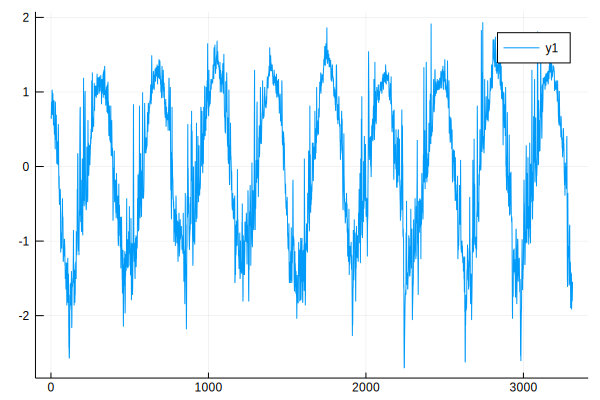

In [719]:
plot(reshape(trt, 3312))

In [721]:
plot(reshape(trt, 3312) * std(cts) .+ mean(cts))

# Building Flux model

In [722]:
using Flux

In [736]:
N_HID = 8

model = Chain(Dense(ML.width(inp), 8, relu),
    Dense(8, ML.width(out)))

loss(x, y) = Flux.mse(model(x), y)
opt = Flux.ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}())

In [737]:
function print_callback()
    current_loss = Flux.data(loss(trf, trt))
    println("Current loss: $current_loss")

    if current_loss < .05
        println("Stopping...")
        Flux.stop()
    end
end

print_callback (generic function with 1 method)

In [738]:
training_data = Iterators.repeated((trf, trt), 1000)

Base.Iterators.Take{Base.Iterators.Repeated{Tuple{LinearAlgebra.Adjoint{Float32,Array{Float32,2}},LinearAlgebra.Adjoint{Float32,Array{Float32,2}}}}}(Base.Iterators.Repeated{Tuple{LinearAlgebra.Adjoint{Float32,Array{Float32,2}},LinearAlgebra.Adjoint{Float32,Array{Float32,2}}}}((Float32[-0.22636776 -0.22636776 … -0.22636776 0.44656578; 0.9556676 0.85328007 … -1.4514202 -1.42396; … ; 0.6754756 0.50907236 … -1.7373714 -1.7540119; -0.47302452 -0.47302452 … 3.3006632 3.0212727], Float32[0.6753424 0.63983387 … -1.6859732 -1.5439392])), 1000)

In [739]:
Flux.train!(loss, Flux.params(model), training_data, opt,
    cb=[print_callback])

Current loss: 1.9883906
Current loss: 1.9572866
Current loss: 1.9265885
Current loss: 1.8963101
Current loss: 1.8664794
Current loss: 1.8370868
Current loss: 1.808078
Current loss: 1.7795482
Current loss: 1.7514688
Current loss: 1.7238448
Current loss: 1.6966791
Current loss: 1.6699749
Current loss: 1.6437649
Current loss: 1.6180685
Current loss: 1.5928527
Current loss: 1.5680916
Current loss: 1.5437231
Current loss: 1.5197835
Current loss: 1.4962513
Current loss: 1.4730898
Current loss: 1.4503018
Current loss: 1.4278935
Current loss: 1.4058496
Current loss: 1.3841577
Current loss: 1.3628117
Current loss: 1.3417751
Current loss: 1.3211011
Current loss: 1.3007189
Current loss: 1.2806059
Current loss: 1.2607738
Current loss: 1.2412109
Current loss: 1.2219256
Current loss: 1.2028956
Current loss: 1.1840996
Current loss: 1.1655283
Current loss: 1.1472101
Current loss: 1.1291152
Current loss: 1.1112667
Current loss: 1.0936661
Current loss: 1.0762823
Current loss: 1.059068
Current loss: 1.04

Current loss: 0.15397087
Current loss: 0.1538269
Current loss: 0.15368412
Current loss: 0.15354252
Current loss: 0.15340222
Current loss: 0.15326332
Current loss: 0.15312524
Current loss: 0.15298824
Current loss: 0.15285234
Current loss: 0.15271752
Current loss: 0.15258378
Current loss: 0.15245117
Current loss: 0.15231936
Current loss: 0.15218855
Current loss: 0.15205821
Current loss: 0.15192851
Current loss: 0.15179978
Current loss: 0.15167218
Current loss: 0.15154557
Current loss: 0.15141964
Current loss: 0.15129521
Current loss: 0.15117195
Current loss: 0.15104973
Current loss: 0.15092863
Current loss: 0.15080762
Current loss: 0.15068722
Current loss: 0.15056774
Current loss: 0.15044908
Current loss: 0.1503312
Current loss: 0.1502142
Current loss: 0.15009809
Current loss: 0.14998263
Current loss: 0.14986782
Current loss: 0.14975376
Current loss: 0.14964053
Current loss: 0.14952834
Current loss: 0.14941716
Current loss: 0.1493068
Current loss: 0.14919724
Current loss: 0.14908852
Curr

Current loss: 0.13416581
Current loss: 0.13414222
Current loss: 0.13411885
Current loss: 0.1340956
Current loss: 0.1340725
Current loss: 0.13404915
Current loss: 0.13402578
Current loss: 0.13400254
Current loss: 0.13397941
Current loss: 0.13395627
Current loss: 0.13393308
Current loss: 0.13390997
Current loss: 0.13388684
Current loss: 0.13386364
Current loss: 0.1338405
Current loss: 0.1338174
Current loss: 0.13379437
Current loss: 0.13377139
Current loss: 0.13374846
Current loss: 0.1337257
Current loss: 0.133703
Current loss: 0.13368021
Current loss: 0.1336575
Current loss: 0.13363482
Current loss: 0.13361228
Current loss: 0.13358982
Current loss: 0.13356742
Current loss: 0.13354503
Current loss: 0.1335227
Current loss: 0.13350046
Current loss: 0.13347824
Current loss: 0.13345596
Current loss: 0.13343379
Current loss: 0.13341166
Current loss: 0.1333896
Current loss: 0.13336758
Current loss: 0.13334562
Current loss: 0.13332373
Current loss: 0.13330194
Current loss: 0.13328005
Current lo

In [733]:
gr()

Plots.GRBackend()

In [740]:
tr_preds = reshape(model(trf).data, 3312) * std(cts) .+ mean(cts)

plot(tr_preds, size=(600, 200), label="training predictions")
plot!(reshape(trt, 3312) * std(cts) .+ mean(cts),
      label="training target")

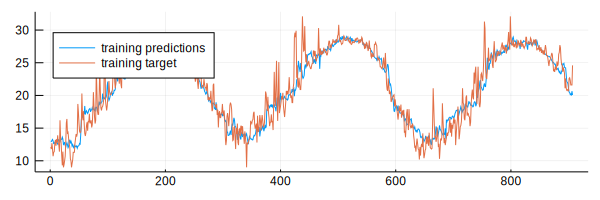

In [754]:
ts_preds = reshape(model(cvf).data, 907) * std(cts) .+ mean(cts)

plot(ts_preds, size=(600, 200), label="training predictions")
plot!(reshape(cvt, 907) * std(cts) .+ mean(cts),
      label="training target", legend=:topleft)

In [744]:
sqrt(loss(trf, trt).data * std(cts) + mean(cts)), sqrt(loss(cvf, cvt).data * std(cts) + mean(cts))

(4.671578050077859, 4.665540000122497)

In [743]:
heatmap(Flux.data(model.layers[1].W))

In [749]:
cv[end-20:end][[:DATE, :TAVG]]

Table with 21 rows, 2 columns:
DATE        TAVG
────────────────
2019-10-12  24.8
2019-10-13  26.3
2019-10-14  26.6
2019-10-16  27.3
2019-10-17  25.6
2019-10-18  24.7
2019-10-20  23.5
2019-10-21  23.6
2019-10-22  24.3
2019-10-25  23.4
2019-10-26  21.1
2019-10-27  22.6
2019-10-28  22.0
2019-10-30  21.1
2019-10-31  20.8
2019-11-01  20.9
2019-11-02  20.7
2019-11-03  21.1
2019-11-04  20.7
2019-11-05  22.6
2019-11-06  22.7

In [752]:
jdf[end-10:end]

Table with 11 rows, 5 columns:
DATE        PRCP  TAVG  TMAX     TMIN
─────────────────────────────────────
2019-11-01  0.0   20.9  25.8     15.8
2019-11-02  0.0   20.7  26.3     15.5
2019-11-03  0.0   21.1  27.6     15.0
2019-11-04  0.0   20.7  28.7     13.9
2019-11-05  0.0   22.6  30.1     13.2
2019-11-06  0.0   22.7  28.9     15.8
2019-11-07  0.0   22.3  missing  16.3
2019-11-08  0.0   21.6  29.4     14.1
2019-11-09  0.0   21.6  28.2     14.5
2019-11-10  0.0   21.6  31.0     15.0
2019-11-11  0.0   24.6  32.3     15.7

In [753]:
ts_preds

907-element Array{Float64,1}:
 12.931334329595664
 12.953140711234502
 13.123022609957417
 13.270278969311427
 13.040626085364885
 12.628784464962315
 12.618823641252854
 12.817468047912552
 12.892436423351208
 13.071717149865497
 12.741947748167245
 12.69619241741691 
 12.559829512991264
  ⋮                
 23.19277012564993 
 22.093562846616404
 22.010416322692326
 21.78408127934284 
 21.072148106798075
 20.52732642642572 
 20.44357946659991 
 20.147618072482075
 20.227962002664103
 19.982602776404672
 20.652478536232696
 20.071810731810864